GitHub Analiza
==============
iz
V tem projektu bomo analizirali najpopularnejše odprte repozitorije na priljubljeni strani GitHub. Podatki so bili zajeti iz https://api.github.com, kar pa v tem REST API-ju ni bilo dosegljivo pa iz https://github.com.

Zajeti podatki
--------------
* lastnik
* ime
* programski jezik
* število zvezdic
* število commitov
* število vej
* število forkov
* število izdaj
* število gledalcev
* število contributorjev
* licenca
* datum nastanka
* datum zadnjega commita

Analizirali bomo, kateri so najpriljubljenejši programski jeziki, kako "veliki" so ti repozitoriji,... in pa kako so ti podatki povezani med seboj.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 20

Naložimo zajete podatke in si oglejmo primer.

In [14]:
repos = pd.read_csv('../data/repositories.csv', parse_dates=[11,12,13])
repos

,owner,name,language,stargazers_count,commit_count,branch_count,release_count,open_issues_count,contributor_count,forks_count,license,created_at,pushed_at,updated_at
0,FreeCodeCamp,FreeCodeCamp,JavaScript,190672,9,20,505,220,0,7344,Other,2014-12-24 17:49:19,2016-11-03 17:42:35,2016-11-03 20:02:55
1,twbs,bootstrap,JavaScript,103092,15,20,795,376,40,46522,MIT License,2011-07-29 21:19:00,2016-11-03 04:01:51,2016-11-03 19:48:01
2,vhf,free-programming-books,NaN,69251,4,3,790,55,0,16839,Other,2013-10-11 06:50:37,2016-11-02 11:40:56,2016-11-03 18:54:01
3,d3,d3,JavaScript,56461,4,34,116,86,206,15144,"BSD 3-clause ""New"" or ""Revised"" License",2010-09-27 17:22:42,2016-11-02 22:32:08,2016-11-03 18:35:41
4,facebook,react,JavaScript,53155,7,32,844,593,52,9378,"BSD 3-clause ""New"" or ""Revised"" License",2013-05-24 16:15:54,2016-11-03 18:42:09,2016-11-03 20:03:30
5,angular,angular.js,JavaScript,53111,8,15,1,855,178,26240,MIT License,2010-01-06 00:34:37,2016-11-03 14:42:33,2016-11-03 20:03:18
6,FortAwesome,Font-Awesome,HTML,46113,1,10,76,3775,24,7955,None,2012-02-17 14:19:43,2016-11-03 15:08:58,2016-11-03 18:54:41
7,sindresorhus,awesome,NaN,45814,584,1,252,30,0,5478,None,2014-07-11 13:42:37,2016-11-03 18:57:50,2016-11-03 19:25:42
8,robbyrussell,oh-my-zsh,Shell,44640,4,1,1,809,0,11093,MIT License,2009-08-28 18:15:37,2016-11-03 13:11:29,2016-11-03 18:46:15
9,getify,You-Dont-Know-JS,JavaScript,44325,1,1,143,90,0,6451,Other,2013-11-16 02:37:24,2016-11-02 22:07:15,2016-11-03 19:50:58


Pandas nam omogoči hiter pregled osnovnih številčnih izračunov.

In [15]:
repos.describe()

,stargazers_count,commit_count,branch_count,release_count,open_issues_count,contributor_count,forks_count
count,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10544.096000,210.31900,16.23900,1030.890000,233.024000,50.044000,2164.573000
std,9517.080181,279.86477,58.51338,22885.017804,519.560752,84.371895,3810.116845
min,5242.000000,1.00000,1.00000,0.000000,0.000000,0.000000,123.000000
25%,6267.750000,2.00000,2.00000,25.000000,27.000000,4.000000,697.500000
50%,7752.500000,39.00000,4.00000,64.500000,84.000000,23.000000,1307.500000
75%,11351.000000,360.00000,10.00000,160.250000,222.500000,61.000000,2438.500000
max,190672.000000,996.00000,978.00000,701516.000000,9043.000000,846.000000,86730.000000


Sedaj si poglejmo, katerega leta so bili ti repozitoriji ustvarjeni.

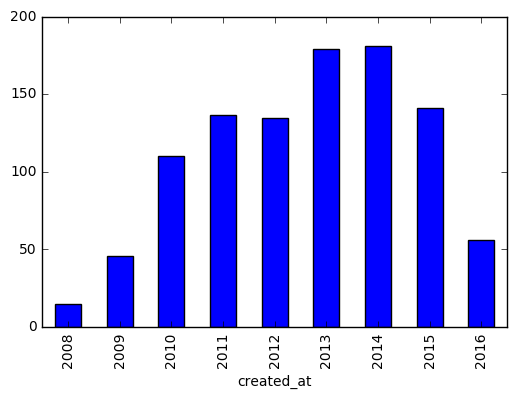

In [16]:
repos.groupby(repos.created_at.dt.year).size().plot(kind='bar')

Vidimo, da je največ projektov nastalo v letih 2013 in 2014, prej GitHub še ni bil tako popularen, novejši projekti pa še niso imeli časa da zaslovijo.

Pogosto bomo uporabljali repozitorije grupirane po jezikih, da pa bo analiza lažja vzemimo le tiste jezike z več kot 10 repozitoriji.

In [17]:
top_languages = repos.groupby("language").filter(lambda x: len(x) > 10).groupby("language")

Zdaj pa si oglejmo, kateri programski jeziki se najpogosteje pojavijo. Prikazali bomo le tiste z več kot 10 repozitoriji, saj drugače ne dobimo uporabnega grafa. Vidimo, da prevladuje JavaScript, sledijo pa mu Java, Objective-C in Python.

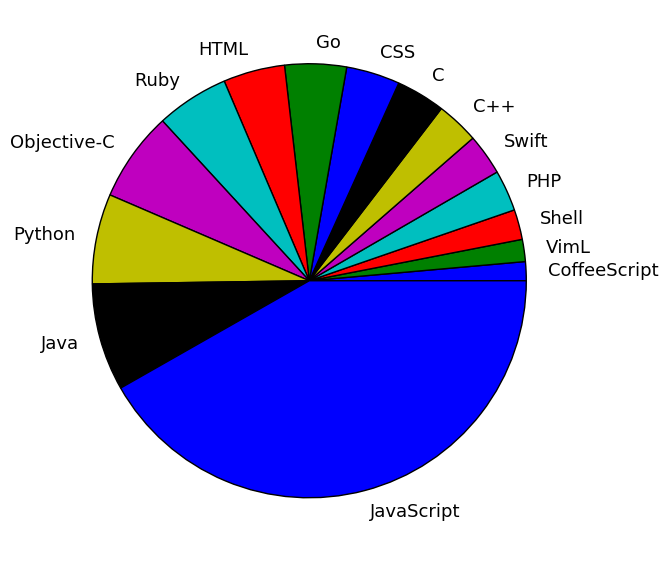

In [18]:
by_lang_pie = top_languages.size().sort_values().plot(kind='pie',figsize=(7, 7), fontsize=13)
by_lang_pie.set_ylabel("") #Removes the none

Narišimo še graf, ki prikazuje odvisnost števila forkov od števila zvezdic. Poskusimo lahko to odvisnost predstaviti kot linearno funkcijo, a hitro vidimo, da prihaja do velikih odstopanj. Vseeno pa iz naraščujoče funkcije lahko sklepamo, da imajo repozitoriji z več zvezdicamo tudi več forkov.

(0, 30000)

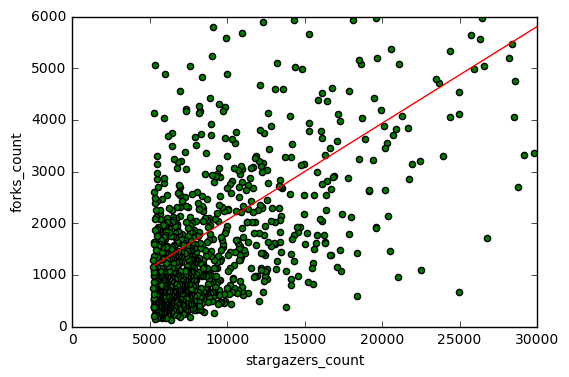

In [19]:
df = repos.copy()
z = np.polyfit(x=df.loc[:, 'stargazers_count'], y=df['forks_count'], deg=1)
p = np.poly1d(z)
df['trendline'] = p(df.loc[:, 'stargazers_count'])

ax = df.plot.scatter(x='stargazers_count', y='forks_count', color='green')

df.set_index('stargazers_count', inplace=True)
df.trendline.sort_index(ascending=False).plot(ax=ax, color='red')
plt.gca().invert_xaxis()
ax.set_ylim(0, 6000)
ax.set_xlim(0, 30000)

Oglejmo si še kako je povezano število commitov z programskim jezikom uporabljenim. Vidimo, da so se najbolj spreminjali repozitoriji v VimL, Shell in Objective-C, najmanj pa C++, Ruby in Coffescript.

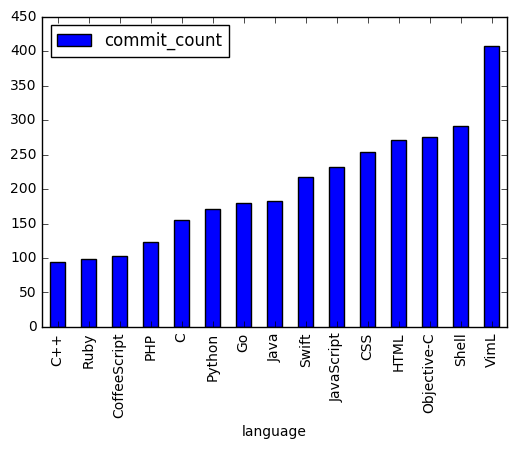

In [20]:
top_languages[["commit_count"]].mean().sort_values("commit_count").plot(kind='bar')

Izpis licenc uporabljenih v teh repozitorijih, razvrščene po vrstnem redu. None pomeni, da licenca ni objavljena, Other pa da uporabljajo lastno licenco.

In [21]:
repos.groupby("license").size().sort_values(ascending=False)

license
MIT License                                     427
None                                            165
Other                                           148
Apache License 2.0                              114
BSD 3-clause "New" or "Revised" License          56
GNU General Public License v3.0                  21
BSD 2-clause "Simplified" License                12
GNU General Public License v2.0                  12
Mozilla Public License 2.0                       12
Creative Commons Zero v1.0 Universal              9
GNU Affero General Public License v3.0            7
GNU Lesser General Public License v2.1            4
Do What The F*ck You Want To Public License       4
The Unlicense                                     2
SIL Open Font License 1.1                         2
GNU Lesser General Public License v3.0            1
Eclipse Public License 1.0                        1
Creative Commons Attribution Share Alike 4.0      1
Creative Commons Attribution 4.0                  1
zlib

Za konec ugotovimo še, koliko izmed teh repozitorijev je sveže posodobljenih (imajo spremebe v zadnje mesecu). True pomeni, da ima spremebe, False da ne.

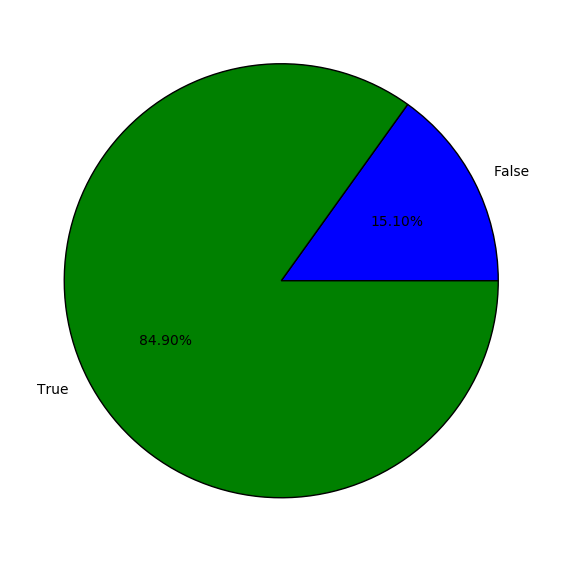

In [22]:
pushed_pie = repos.groupby(repos.pushed_at >= "2016-10-03").size().plot(kind='pie',figsize=(7, 7), autopct='%.2f%%')
pushed_pie.set_ylabel("") #Removes the none